In [23]:
import pandas as pd
import numpy as np
import re

from sklearn.metrics import mean_squared_error
from math import sqrt

import seaborn as sns
%matplotlib inline

In [2]:
%%time
from pullenti_wrapper.langs import (
    set_langs,
    RU,
    EN
)



Wall time: 440 ms


In [3]:
%%time
from pullenti_wrapper.processor import (
    Processor,
    GEO
)


Wall time: 107 ms


In [4]:
set_langs([RU])

In [5]:
df = pd.read_csv('./corpus-of-russian-news-articles-from-lenta/text_2.csv', sep=';')

In [6]:
!chcp 65001

Active code page: 65001


In [7]:
df.head()

,url,title,text,topic,tags,etalon
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертно...,Вице-премьер по социальным вопросам Татьяна Го...,Россия,Общество,"(82, 88),(251, 260),(262, 270),(272, 280),(283..."
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины росс...,Австрийские правоохранительные органы не предс...,Спорт,Зимние виды,"(148, 154),(157, 161),(586, 592),(595, 606),(8..."
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,Сотрудники социальной сети Instagram проанализ...,Путешествия,Мир,"(271, 276),(952, 960)"
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование...,С начала расследования российского вмешательст...,Мир,Политика,"(65, 68),(183, 186),(455, 458),(668, 671),(100..."
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании зами...,Хакерская группировка Anonymous опубликовала н...,Мир,Общество,"(384, 398),(508, 513),(555, 570),(640, 645),(9..."


In [8]:
%%time
processor = Processor([GEO])

Wall time: 6.12 s


In [9]:
def find_entities(text):
    x = []
    result = processor(text) 
    for i in result.matches:
        x.append((i.span.start, i.span.stop))
    return x


def not_found(etalon, cur_value):
    return set(etalon) - set(cur_value)


def extra_found(etalon, cur_value):
    return set(cur_value) - set(etalon)

In [10]:
def get_etalon_from_str(str_val):
    if not str_val or not isinstance(str_val, str):
        return []
    vals = [int(x) for x in re.findall("\d+", str_val)]
    return list(zip([vals[i] for i in range(len(vals)) if i%2==0]
               ,[vals[i] for i in range(len(vals)) if i%2==1]))

In [11]:
df['find_entities'] = df['text'].apply(find_entities)

In [12]:
df['etalon'] = df['etalon'].apply(get_etalon_from_str)

In [13]:
def create_not_found_column(row):
    return not_found(row['etalon'], row['find_entities'])
    pass

In [14]:
df['not_found'] = df.apply(create_not_found_column, axis=1)

In [15]:
def create_extra_found_column(row):
    return extra_found(row['etalon'], row['find_entities'])
    pass

In [16]:
df['extra_found'] = df.apply(create_extra_found_column, axis = 1)

In [17]:
def num_found(cur_value):
    return len(cur_value)

def num_etalon(etalon):
    return len(etalon)

In [18]:
df['find_entities_num'] = df['find_entities'].apply(num_found)
df['etalon_num'] = df['etalon'].apply(num_etalon)
df['%_found'] = df['find_entities_num'] / df['etalon_num'] * 100
df

,url,title,text,topic,tags,etalon,find_entities,not_found,extra_found,find_entities_num,etalon_num,%_found
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертно...,Вице-премьер по социальным вопросам Татьяна Го...,Россия,Общество,"[(82, 88), (251, 260), (262, 270), (272, 280),...","[(82, 88), (251, 260), (262, 270), (272, 280),...","{(283, 292)}","{(283, 301)}",7,7,100.000000
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины росс...,Австрийские правоохранительные органы не предс...,Спорт,Зимние виды,"[(148, 154), (157, 161), (586, 592), (595, 606...","[(148, 154), (157, 161), (586, 592), (963, 970)]","{(858, 869), (595, 606)}",{},4,6,66.666667
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,Сотрудники социальной сети Instagram проанализ...,Путешествия,Мир,"[(271, 276), (952, 960)]","[(271, 276), (952, 960)]",{},{},2,2,100.000000
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование...,С начала расследования российского вмешательст...,Мир,Политика,"[(65, 68), (183, 186), (455, 458), (668, 671),...","[(65, 68), (183, 186), (455, 458), (668, 671),...",{},{},8,8,100.000000
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании зами...,Хакерская группировка Anonymous опубликовала н...,Мир,Общество,"[(384, 398), (508, 513), (555, 570), (640, 645...","[(384, 398), (508, 513), (640, 645), (1115, 11...","{(933, 942), (555, 570)}",{},11,13,84.615385
5,https://lenta.ru/news/2018/12/15/sobor/,Архиепископ канонической УПЦ отказался прийти ...,Архиепископ канонической Украинской православн...,Бывший СССР,Украина,"[(797, 805), (917, 924), (1006, 1011), (1118, ...","[(797, 805), (917, 924), (1006, 1011), (1118, ...","{(1408, 1415)}",{},4,5,80.000000
6,https://lenta.ru/news/2018/12/15/skrepy/,Российскую молодежь предложили обучать духовны...,Российская молодежь лучше усвоит духовные ценн...,Интернет и СМИ,Coцсети,"[(230, 236), (273, 279)]","[(230, 236), (273, 279)]",{},{},2,2,100.000000
7,https://lenta.ru/news/2018/12/15/skripal/,Полицейские из Солсбери описали одеревеневшего...,"Полицейские Алекс Коллинс и Трейси Холлоуэй, о...",Мир,Общество,"[(1661, 1669), (1671, 1677), (1815, 1821), (18...","[(1671, 1677), (1815, 1821), (1823, 1829)]","{(1661, 1669)}",{},3,4,75.000000
8,https://lenta.ru/news/2018/12/15/tu160/,Полет российских бомбардировщиков над Карибски...,Минобороны опубликовало на YouTube видео полет...,Мир,Политика,"[(114, 123), (136, 151), (305, 319)]","[(114, 123)]","{(136, 151), (305, 319)}",{},1,3,33.333333
9,https://lenta.ru/news/2018/12/15/zrk/,В Минобороны раскрыли многомиллионные хищения ...,Директора завода «Электроприбор» Муталиба Эмир...,Силовые структуры,Следствие и суд,"[(280, 286), (334, 343), (567, 574), (764, 769...","[(280, 286), (334, 343), (567, 574), (764, 769...",{},{},5,5,100.000000


In [19]:
df['%_found'].mean()

84.62648129710948

In [20]:
rms = sqrt(mean_squared_error(df['etalon_num'], df['find_entities_num']))
rms

1.8090680674665818

In [21]:
def show_text_vals(text, pos):
    res = []
    for s,e in pos:
        res.append(text[s:e])
    return res

for col in ['etalon', 'not_found', 'extra_found']:
    df[f'{col}_text'] = df.apply(lambda row: show_text_vals(row['text'], row[col]), axis = 1)

In [28]:
df.head()

,url,title,text,topic,tags,etalon,find_entities,not_found,extra_found,find_entities_num,etalon_num,%_found,etalon_text,not_found_text,extra_found_text
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертно...,Вице-премьер по социальным вопросам Татьяна Го...,Россия,Общество,"[(82, 88), (251, 260), (262, 270), (272, 280),...","[(82, 88), (251, 260), (262, 270), (272, 280),...","{(283, 292)}","{(283, 301)}",7,7,100.000000,"[России, Псковской, Тверской, Тульской, Орловс...",[Орловской],[Орловской областях]
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины росс...,Австрийские правоохранительные органы не предс...,Спорт,Зимние виды,"[(148, 154), (157, 161), (586, 592), (595, 606...","[(148, 154), (157, 161), (586, 592), (963, 970)]","{(858, 869), (595, 606)}",{},4,6,66.666667,"[России, Вене, России, Хохфильцене, Обертиллах...","[Обертиллахе, Хохфильцене]",[]
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,Сотрудники социальной сети Instagram проанализ...,Путешествия,Мир,"[(271, 276), (952, 960)]","[(271, 276), (952, 960)]",{},{},2,2,100.000000,"[Токио, Исландия]",[],[]
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование...,С начала расследования российского вмешательст...,Мир,Политика,"[(65, 68), (183, 186), (455, 458), (668, 671),...","[(65, 68), (183, 186), (455, 458), (668, 671),...",{},{},8,8,100.000000,"[США, США, США, США, Россией, Россию, США, США]",[],[]
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании зами...,Хакерская группировка Anonymous опубликовала н...,Мир,Общество,"[(384, 398), (508, 513), (555, 570), (640, 645...","[(384, 398), (508, 513), (640, 645), (1115, 11...","{(933, 942), (555, 570)}",{},11,13,84.615385,"[Великобритании, Крыму, Севастопольскую, Крыму...","[Каталонии, Севастопольскую]",[]


In [22]:
df.to_csv("text_1.csv", sep='\t', encoding='utf-8')

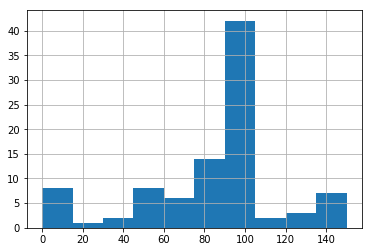

In [26]:
df['%_found'].hist();

Комментарии:

1) pullenti не выделяет прилагательные(по типу российские, австрийские и т.д.)

2) если есть категориальные признаки для географии (город, регион, область), то они тоже выделяются в сущности

3) при ручной разметке не выделялись иностранные названия городов. pullenti их выделил

4) сложности у pullenti иногда возникают с названиями континентов и очень маленьких городков (видимо нет в изначальном справочнике)
